In [ ]:
############################## Read Data ####################################

# Pandas is used for data manipulation
import pandas as pd
import numpy as np
# upload data

features = pd.read_excel('Alldata236.xlsx')

features= features.drop('Unnamed: 0', axis = 1)
# features.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features

,temper,Si (%),Fe (%),Cu (%),Mn (%),Mg (%),Cr (%),Ni (%),Zn (%),Ti (%),...,alloy name,resistance to general corrosion,resistance to stress corrosion cracking,cold workability,machinability,brazeability,gas weldability,arc weldability,resistance and spot weldability,extrudability
0,H25,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5657.0,Excellent,Very Good,Very Good,Borderline,Borderline,Excellent,Excellent,Excellent,Very Good
1,H28,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5657.0,Excellent,Excellent,Fair,Borderline,Borderline,Excellent,Excellent,Excellent,Very Good
2,H32,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Excellent,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
3,H34,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Very Good,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
4,H36,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,5005.0,Excellent,Excellent,Fair,Borderline,Very Good,Excellent,Excellent,Excellent,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,O,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Excellent,Very Good,Borderline,Borderline,Borderline,Very Good,Very Good,Very Good
232,T4,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Very Good,Fair,Fair,Borderline,Borderline,Very Good,Very Good,Very Good
233,T6,1.4,0.0,1.0,0.8,1.1,0.0,0.0,0.0,0.0,...,6066.0,Fair,Very Good,Fair,Very Good,Borderline,Borderline,Very Good,Very Good,Very Good
234,T6,12.2,0.0,0.9,0.0,1.1,0.0,0.9,0.0,0.0,...,4032.0,Fair,Very Good,Fair,Very Good,Borderline,Borderline,Very Good,Fair,Excellent


In [ ]:
########## remove the columns that we don't need
########## remove technological properties columns

features= features.drop('alloy name', axis = 1)

features= features.drop('resistance to general corrosion', axis = 1)
features= features.drop('resistance to stress corrosion cracking', axis = 1)
features= features.drop('cold workability', axis = 1)
features= features.drop('machinability', axis = 1)
features= features.drop('brazeability', axis = 1)
features= features.drop('gas weldability', axis = 1)
features= features.drop('arc weldability', axis = 1)
features= features.drop('resistance and spot weldability', axis = 1)
features= features.drop('extrudability', axis = 1)



# One-hot encode tempers column
features = pd.get_dummies(features)
features.head(5)




In [ ]:
############ define mechanical properties labels

label1 = np.array(features['UTS'])
label2 = np.array(features['TYS'])
label3 = np.array(features['Elong'])
label4 = np.array(features['BHN'])
label5 = np.array(features['Shear'])
label6 = np.array(features['Endurance'])
label7 = np.array(features['Elastic'])

## removing the labels from features
features= features.drop('UTS', axis = 1)
features= features.drop('TYS', axis = 1)
features= features.drop('Elong', axis = 1)
features= features.drop('BHN', axis = 1)
features= features.drop('Shear', axis = 1)
features= features.drop('Endurance', axis = 1)
features= features.drop('Elastic', axis = 1)


# Saving feature names for later use
feature_list = list(features.columns)
features = np.array(features)


In [ ]:
######## trying normalized input
# from sklearn.model_selection import train_test_split
# train_features, test_features, train_labels, test_labels = train_test_split(features, label1,
#                                                                                 test_size = 0.2,
#                                                                                 random_state = 26)

# ### Normalize (MinMaxScaler)
# ### create scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() ##default max min range is (0,1)
# #### fit scaler on data
# scaler.fit(train_features)
# #### apply transform
# new = scaler.transform(features)
# features = pd.DataFrame(new, columns=feature_list)



In [ ]:
################### split test and train sets ###############################
from sklearn.model_selection import train_test_split
test_ratio = 0.2
SEED = 26 ### the test/train data is checked on this seed, it has similiar distribution to the whole dataset
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, label2,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features, label3,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features4, test_features4, train_labels4, test_labels4 = train_test_split(features, label4,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features5, test_features5, train_labels5, test_labels5 = train_test_split(features, label5,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


train_features6, test_features6, train_labels6, test_labels6 = train_test_split(features, label6,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)


In [ ]:
##################  7- build Model ######################################
################################################################################
model_seed = 100 ###set the seed for  building models constant to make the results reproducible
######################## Random Forest ####################################
from sklearn.ensemble import RandomForestRegressor
##### default
Model1 = RandomForestRegressor(random_state=model_seed)
Model2 = RandomForestRegressor(random_state=model_seed)
Model3 = RandomForestRegressor(random_state=model_seed)
Model4 = RandomForestRegressor(random_state=model_seed)
Model5 = RandomForestRegressor(random_state=model_seed)
Model6 = RandomForestRegressor(random_state=model_seed)


# # ## optimized 3/13/2022
# Model1 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto')
# Model2 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto')
# Model3 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto')
# Model4 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto')
# Model5 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto')
# Model6 = RandomForestRegressor(random_state=model_seed, max_depth=60, max_features='auto', n_estimators=200, min_samples_split=7)


######################## XGBoost ##############################################

# import xgboost as xgb

#### default
# Model1 = xgb.XGBRegressor(random_state = model_seed)
# Model2 = xgb.XGBRegressor(random_state = model_seed)
# Model3 = xgb.XGBRegressor(random_state = model_seed)
# Model4 = xgb.XGBRegressor(random_state = model_seed)
# Model5 = xgb.XGBRegressor(random_state = model_seed)
# Model6 = xgb.XGBRegressor(random_state = model_seed)


#### optimized 03/14/2022
# Model1 = xgb.XGBRegressor(random_state = SEED, booster='gbtree' , n_estimators=50, max_depth =45, learning_rate=0.35, gamma=500)
# Model2 = xgb.XGBRegressor(random_state = SEED, booster='gbtree' , n_estimators=50, max_depth =40, learning_rate=0.1, gamma=50)
# Model3 = xgb.XGBRegressor(random_state = SEED, booster='dart' , n_estimators=65, max_depth =3, learning_rate=0.4, gamma=0)
# Model4 = xgb.XGBRegressor(random_state = SEED,booster='dart' , n_estimators=50, max_depth =40, learning_rate=0.2, gamma=5)
# Model5 = xgb.XGBRegressor(random_state = SEED,booster='gbtree' , n_estimators=50, max_depth =40, learning_rate=0.4, gamma=1000)
# Model6 = xgb.XGBRegressor(random_state = SEED,booster='gbtree' , n_estimators=50, max_depth =3, learning_rate=0.1, gamma=500)


##################### SVM-SVR #####################
# from sklearn import svm

### optimized 03-17-2022

# Model1 = svm.SVR(kernel='rbf', gamma=0.3, C=500, epsilon=0.2)
# Model2 = svm.SVR(kernel='rbf', gamma=0.2, C=500, epsilon=0.2)
# Model3 = svm.SVR(kernel='rbf', gamma=0.021, C=481, epsilon=0.5, degree=22)
# Model4 = svm.SVR(kernel='rbf', gamma=0.3, C=500, epsilon=0.2)
# Model5 = svm.SVR(kernel='rbf', gamma=0.3, C=250, epsilon=0.2)
# Model6 = svm.SVR(kernel='rbf', gamma=0.1, C=91, epsilon=0.45)



In [ ]:
############################# evaluate function #############################
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def evaluate(true_labels, pred_labels):
    errors = abs(pred_labels - true_labels)
    MAE = round(np.mean(errors), 2)
    MAE2 = mean_absolute_error(true_labels, pred_labels)
    mape = 100 * np.mean(errors / true_labels)
    #R2, and adjusted R2
    r2 = r2_score(true_labels, pred_labels)

    ## p is the total number of explanatory variables in the model
    ## and n is the sample size.
    p = n_features
    n = n_samples
    
    r2_adjusted = 1-(1-r2)*(n-1)/(n-p-1)
    r2_adjusted = np.array(r2_adjusted)


    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(true_labels, pred_labels,squared=False)

    #return accuracy, MAE, MAPE, r2_adjusted, r2_mean_5cv
    return mape, MAE, RMSE, r2, r2_adjusted

In [ ]:
# ########################## LOOCV cross validation ################################
### this function returns the LOOCV mean and std values for MAPE, MAE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LeaveOneOut
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_validate
	
from sklearn.metrics import mean_squared_error

CV = LeaveOneOut()

def kfoldcvMAE(features, label, Model):
  scores = cross_validate(Model, features, label, cv=CV, scoring=('neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))
 
  #### force positive
  MAE_CV = absolute(scores['test_neg_mean_absolute_error'])
  MAPE_CV = absolute(scores['test_neg_mean_absolute_percentage_error'])

  MAE_CV_mean = mean(MAE_CV)
  MAE_CV_std = std(MAE_CV)

  MAPE_CV_mean = mean(MAPE_CV)
  MAPE_CV_std = std(MAPE_CV)

  return MAE_CV_mean, MAE_CV_std, MAPE_CV_mean, MAPE_CV_std

In [ ]:
################# training, predicting and evaluating ##################

Model1.fit(train_features1, train_labels1)
Model2.fit(train_features2,train_labels2)
Model3.fit(train_features3,train_labels3)
Model4.fit(train_features4,train_labels4)
Model5.fit(train_features5,train_labels5)
Model6.fit(train_features6,train_labels6)
print('###################################################################')
print('evaluatoin of the RF model on testing dataset')

predictions1 = Model1.predict(test_features1)
predictions2 = Model2.predict(test_features2)
predictions3 = Model3.predict(test_features3)
predictions4 = Model4.predict(test_features4)
predictions5 = Model5.predict(test_features5)
predictions6 = Model6.predict(test_features6)



model_accuracy1, model_MAE1, model_RMSE1, model_r21, model_r2_adjusted1 = evaluate(test_labels1, predictions1)
model_accuracy2, model_MAE2, model_RMSE2, model_r22, model_r2_adjusted2 = evaluate(test_labels2, predictions2)
model_accuracy3, model_MAE3, model_RMSE3, model_r23, model_r2_adjusted3 = evaluate(test_labels3, predictions3)
model_accuracy4, model_MAE4, model_RMSE4, model_r24, model_r2_adjusted4 = evaluate(test_labels4, predictions4)
model_accuracy5, model_MAE5, model_RMSE5, model_r25, model_r2_adjusted5 = evaluate(test_labels5, predictions5)
model_accuracy6, model_MAE6, model_RMSE6, model_r26, model_r2_adjusted6 = evaluate(test_labels6, predictions6)


MAE_CV_mean1, MAE_CV_std1, mape_CV_mean1, mape_CV_std1 = kfoldcvMAE(features,label1, Model1)
MAE_CV_mean2, MAE_CV_std2, mape_CV_mean2, mape_CV_std2 = kfoldcvMAE(features,label2, Model2)
MAE_CV_mean3, MAE_CV_std3, mape_CV_mean3, mape_CV_std3 = kfoldcvMAE(features,label3, Model3)
MAE_CV_mean4, MAE_CV_std4, mape_CV_mean4, mape_CV_std4 = kfoldcvMAE(features,label4, Model4)
MAE_CV_mean5, MAE_CV_std5, mape_CV_mean5, mape_CV_std5 = kfoldcvMAE(features,label5, Model5)
MAE_CV_mean6, MAE_CV_std6, mape_CV_mean6, mape_CV_std6 = kfoldcvMAE(features,label6, Model6)





###################################################################
evaluatoin of the RF model on testing dataset


In [ ]:

final_output = pd.DataFrame()
final_output.loc[:,1] = [model_accuracy1, model_MAE1, model_RMSE1, model_r21, model_r2_adjusted1, MAE_CV_mean1, MAE_CV_std1, mape_CV_mean1, mape_CV_std1]
final_output.loc[:,2] = [model_accuracy2, model_MAE2, model_RMSE2, model_r22, model_r2_adjusted2, MAE_CV_mean2, MAE_CV_std2, mape_CV_mean2, mape_CV_std2]
final_output.loc[:,3] = [model_accuracy3, model_MAE3, model_RMSE3, model_r23, model_r2_adjusted3, MAE_CV_mean3, MAE_CV_std3, mape_CV_mean3, mape_CV_std3]
final_output.loc[:,4] = [model_accuracy4, model_MAE4, model_RMSE4, model_r24, model_r2_adjusted4, MAE_CV_mean4, MAE_CV_std4, mape_CV_mean4, mape_CV_std4]
final_output.loc[:,5] = [model_accuracy5, model_MAE5, model_RMSE5, model_r25, model_r2_adjusted5, MAE_CV_mean5, MAE_CV_std5, mape_CV_mean5, mape_CV_std5]
final_output.loc[:,6] = [model_accuracy6, model_MAE6, model_RMSE6, model_r26, model_r2_adjusted6, MAE_CV_mean6, MAE_CV_std6, mape_CV_mean6, mape_CV_std6]

final_output=pd.DataFrame(final_output)
final_output=final_output.T
final_output.columns = ['MAPE', 'MAE', 'RMSE', 'R2', 'Adjusted R2', 'CV MAE mean', 'CV MAE std', 'CV MAPE mean','CV MAPE std', 'CV RMSE mean', 'CV RMSE std']
final_output.index = ['UTS', 'TYS', ' Elong', 'BHN', 'Shear', 'Endurance']
final_output.to_excel(r'final_output_1seed.xlsx', index = True)

In [ ]:
########################## LOOCV ################################
#### this returns mean values for R2, adjusted R2 and RMSE too
#################################################################
from sklearn.model_selection import cross_val_predict
cv = LeaveOneOut()

y_pred1 = cross_val_predict(Model1, features, label1, cv=cv)
y_pred2 = cross_val_predict(Model2, features, label2, cv=cv)
y_pred3 = cross_val_predict(Model3, features, label3, cv=cv)
y_pred4 = cross_val_predict(Model4, features, label4, cv=cv)
y_pred5 = cross_val_predict(Model5, features, label5, cv=cv)
y_pred6 = cross_val_predict(Model6, features, label6, cv=cv)

model_accuracy1, model_MAE1, model_RMSE1, model_r21, model_r2_adjusted1 = evaluate(label1, y_pred1)
model_accuracy2, model_MAE2, model_RMSE2, model_r22, model_r2_adjusted2 = evaluate(label2, y_pred2)
model_accuracy3, model_MAE3, model_RMSE3, model_r23, model_r2_adjusted3 = evaluate(label3, y_pred3)
model_accuracy4, model_MAE4, model_RMSE4, model_r24, model_r2_adjusted4 = evaluate(label4, y_pred4)
model_accuracy5, model_MAE5, model_RMSE5, model_r25, model_r2_adjusted5 = evaluate(label5, y_pred5)
model_accuracy6, model_MAE6, model_RMSE6, model_r26, model_r2_adjusted6 = evaluate(label6, y_pred6)


final_output = pd.DataFrame()
final_output.loc[:,1] = [model_accuracy1, model_MAE1, model_RMSE1, model_r21, model_r2_adjusted1]
final_output.loc[:,2] = [model_accuracy2, model_MAE2, model_RMSE2, model_r22, model_r2_adjusted2]
final_output.loc[:,3] = [model_accuracy3, model_MAE3, model_RMSE3, model_r23, model_r2_adjusted3]
final_output.loc[:,4] = [model_accuracy4, model_MAE4, model_RMSE4, model_r24, model_r2_adjusted4]
final_output.loc[:,5] = [model_accuracy5, model_MAE5, model_RMSE5, model_r25, model_r2_adjusted5]
final_output.loc[:,6] = [model_accuracy6, model_MAE6, model_RMSE6, model_r26, model_r2_adjusted6]
final_output=pd.DataFrame(final_output)
final_output=final_output.T
final_output.columns = ['MAPE', 'MAE', 'RMSE', 'R2', 'Adjusted R2']
final_output.index = ['UTS', 'TYS', ' Elong', 'BHN', 'Shear', 'Endurance']
final_output.to_excel(r'final_output_LOOCV.xlsx', index = True)


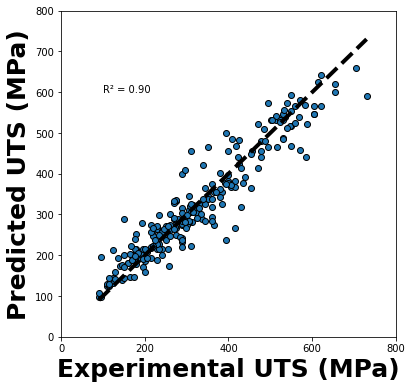

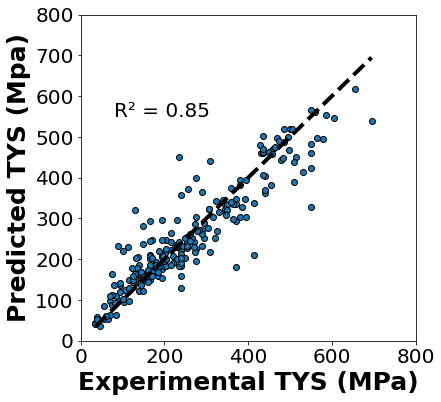

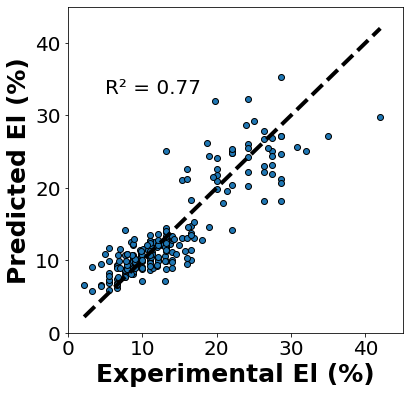

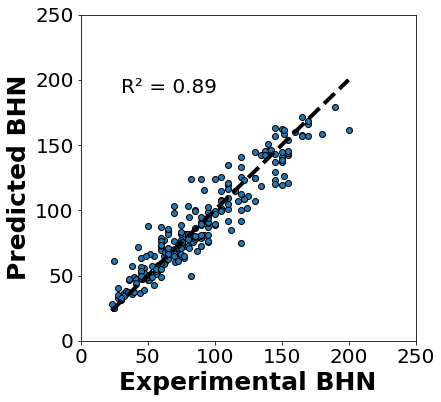

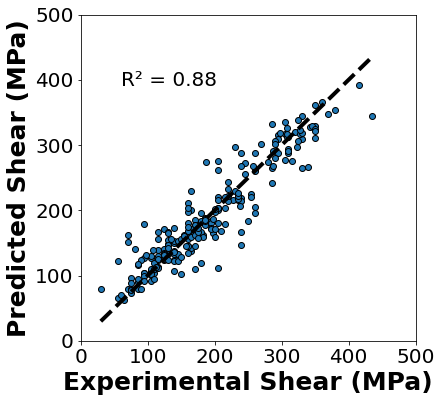

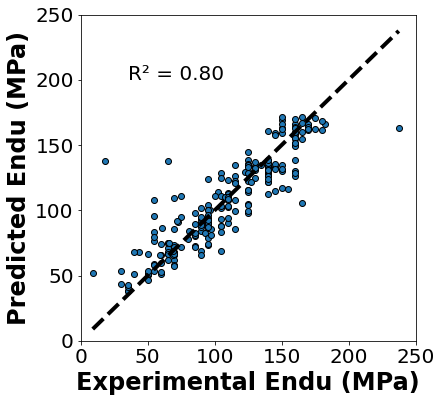

In [ ]:
# #################### visualize real vs predicted data ####################
############## scatter plots
import matplotlib.pyplot as plt


predictions1 = y_pred1
predictions2 = y_pred2
predictions3 = y_pred3
predictions4 = y_pred4
predictions5 = y_pred5
predictions6 = y_pred6

test_labels1 = label1
test_labels2 = label2
test_labels3 = label3
test_labels4 = label4
test_labels5 = label5
test_labels6 = label6
test_labels7 = label7

fontsize = 25
fonts = '20'
########## UTS
ig1, ax1 = plt.subplots(figsize=(6,6))
ax1.scatter(test_labels1, predictions1, edgecolors=(0, 0, 0))
ax1.plot([test_labels1.min(), test_labels1.max()], [test_labels1.min(), test_labels1.max()], 'k--', lw=4)
ax1.set_xlabel('Experimental UTS (MPa)', size=fontsize, fontweight="bold")
ax1.set_ylabel('Predicted UTS (MPa)', size=fontsize, fontweight="bold")
ax1.annotate('R\u00b2 = {:.2f}'.format(model_r21), (100,600))

plt.rcParams['font.size'] = fonts
plt.xlim([0,800])
plt.ylim([0,800])

plt.show()

########## TYS
ig2, ax2 = plt.subplots(figsize=(6,6))
ax2.scatter(test_labels2, predictions2, edgecolors=(0, 0, 0))
ax2.plot([test_labels2.min(), test_labels2.max()], [test_labels2.min(), test_labels2.max()], 'k--', lw=4)
ax2.set_xlabel('Experimental TYS (MPa)', size=fontsize, fontweight="bold")
ax2.set_ylabel('Predicted TYS (Mpa)', size=fontsize, fontweight="bold")
ax2.annotate('R\u00b2 = {:.2f}'.format(model_r22), (80,550))
plt.xlim([0,800])
plt.ylim([0,800])

plt.rcParams['font.size'] = fonts
plt.show()

########## Elongation
ig3, ax3 = plt.subplots(figsize=(6,6))
ax3.scatter(test_labels3, predictions3, edgecolors=(0, 0, 0))
ax3.plot([test_labels3.min(), test_labels3.max()], [test_labels3.min(), test_labels3.max()], 'k--', lw=4)
ax3.set_xlabel('Experimental El (%)', size=fontsize, fontweight="bold")
ax3.set_ylabel('Predicted El (%)', size=fontsize, fontweight="bold")
# ax3.set_title('Elongation')
ax3.annotate('R\u00b2 = {:.2f}'.format(model_r23), (5,33))
plt.xlim([0,45])
plt.ylim([0,45])

plt.rcParams['font.size'] = fonts
plt.show()
########## BHN
ig4, ax4 = plt.subplots(figsize=(6,6))
ax4.scatter(test_labels4, predictions4, edgecolors=(0, 0, 0))
ax4.plot([test_labels4.min(), test_labels4.max()], [test_labels4.min(), test_labels4.max()], 'k--', lw=4)
ax4.set_xlabel('Experimental BHN', size=fontsize, fontweight="bold")
ax4.set_ylabel('Predicted BHN', size=fontsize, fontweight="bold")
ax4.annotate('R\u00b2 = {:.2f}'.format(model_r24), (30,190))
plt.xlim([0,250])
plt.ylim([0,250])

plt.rcParams['font.size'] = fonts
plt.show()

########## Shear
ig5, ax5 = plt.subplots(figsize=(6,6))
ax5.scatter(test_labels5, predictions5, edgecolors=(0, 0, 0))
ax5.plot([test_labels5.min(), test_labels5.max()], [test_labels5.min(), test_labels5.max()], 'k--', lw=4)
ax5.set_xlabel('Experimental Shear (MPa)', size=fontsize, fontweight="bold")
ax5.set_ylabel('Predicted Shear (MPa)', size=fontsize, fontweight="bold")
ax5.annotate('R\u00b2 = {:.2f}'.format(model_r25), (60,390))
plt.xlim([0,500])
plt.ylim([0,500])

plt.rcParams['font.size'] = fonts
plt.show()

########## Endurance
fontsize = 24
ig6, ax6 = plt.subplots(figsize=(6,6))
ax6.scatter(test_labels6, predictions6, edgecolors=(0, 0, 0))
ax6.plot([test_labels6.min(), test_labels6.max()], [test_labels6.min(), test_labels6.max()], 'k--', lw=4)
ax6.set_xlabel('Experimental Endu (MPa)', size=fontsize, fontweight="bold")
ax6.set_ylabel('Predicted Endu (MPa)', size=fontsize, fontweight="bold")
ax6.annotate('R\u00b2 = {:.2f}'.format(model_r26), (35,200))
plt.xlim([0,250])
plt.ylim([0,250])

plt.rcParams['font.size'] = fonts
plt.show()
